# Process AMULET

Look at AMULET results and write final set of doublets. ArchR doublet scores look wonky (high for keratinocyte-like cells), so will be using AMULET.

In [12]:
library(ggplot2)
library(patchwork)

In [5]:
d1m_amulet_doub = as.character(unlist(read.table("./AMULET/D1M/MultipletBarcodes_01.txt")$V1))
d2m_amulet_doub = as.character(unlist(read.table("./AMULET/D2M/MultipletBarcodes_01.txt")$V1))

In [6]:
d1m_osum = read.table("./AMULET/D1M/OverlapSummary.txt", header=T, sep='\t')
d1m_osum$logr = log10(d1m_osum$Number.of.Valid.Reads)
d1m_osum$doub = as.character(d1m_osum$Cell.Id) %in% d1m_amulet_doub
d1m_osum$frac = d1m_osum$Number.of.Overlaps/d1m_osum$Number.of.Valid.Reads
head(d1m_osum)

,Cell.Id,Number.of.Valid.Reads,Number.of.Overlaps,Barcode,Total.Number.of.Reads,logr,doub,frac
,<fct>,<int>,<int>,<fct>,<int>,<dbl>,<lgl>,<dbl>
1,AAAAAAAAAAACATGCTACGCCAC,10090,24,AAAAAAAAAAACATGCTACGCCAC,11903,4.003891,FALSE,0.0023785927
2,AAAAAAAAAAACATGCTATTAGCC,6215,3,AAAAAAAAAAACATGCTATTAGCC,6736,3.793441,FALSE,0.0004827031
3,AAAAAAAAAAACATGCTCACCCTC,25353,50,AAAAAAAAAAACATGCTCACCCTC,28369,4.404029,FALSE,0.0019721532
4,AAAAAAAAAAACATGCTTGAGAAC,25884,47,AAAAAAAAAAACATGCTTGAGAAC,28635,4.413031,FALSE,0.0018157935
5,AAAAAAAAAAACCATGAACCTTGT,30118,84,AAAAAAAAAAACCATGAACCTTGT,33869,4.478826,FALSE,0.0027890298
6,AAAAAAAAAAACCATGACGCCTAT,8223,9,AAAAAAAAAAACCATGACGCCTAT,8975,3.915030,FALSE,0.0010944911


In [7]:
d2m_osum = read.table("./AMULET/D2M/OverlapSummary.txt", header=T, sep='\t')
d2m_osum$logr = log10(d2m_osum$Number.of.Valid.Reads)
d2m_osum$doub = as.character(d2m_osum$Cell.Id) %in% d2m_amulet_doub
d2m_osum$frac = d2m_osum$Number.of.Overlaps/d2m_osum$Number.of.Valid.Reads
head(d2m_osum)

,Cell.Id,Number.of.Valid.Reads,Number.of.Overlaps,Barcode,Total.Number.of.Reads,logr,doub,frac
,<fct>,<int>,<int>,<fct>,<int>,<dbl>,<lgl>,<dbl>
1,AAAAAAAAAAACATGCTAAGGTGC,3339,1,AAAAAAAAAAACATGCTAAGGTGC,3676,3.523616,FALSE,0.0002994909
2,AAAAAAAAAAACATGCTGACTTTG,3937,0,AAAAAAAAAAACATGCTGACTTTG,4037,3.595165,FALSE,0.0000000000
3,AAAAAAAAAAACATGCTGTCCATA,11108,8,AAAAAAAAAAACATGCTGTCCATA,11912,4.045636,FALSE,0.0007202017
4,AAAAAAAAAAACATGCTTGAGGCG,8543,14,AAAAAAAAAAACATGCTTGAGGCG,9713,3.931610,FALSE,0.0016387686
5,AAAAAAAAAAACCATGACCTAGCT,4315,3,AAAAAAAAAAACCATGACCTAGCT,4761,3.634981,FALSE,0.0006952491
6,AAAAAAAAAAACCATGAGCCACCT,54342,86,AAAAAAAAAAACCATGAGCCACCT,56742,4.735136,TRUE,0.0015825697


In [18]:
nrow(d1m_osum)
nrow(d2m_osum)

[1] 5618

[1] 7796

In [8]:
length(d1m_amulet_doub)
length(d2m_amulet_doub)

[1] 781

[1] 854

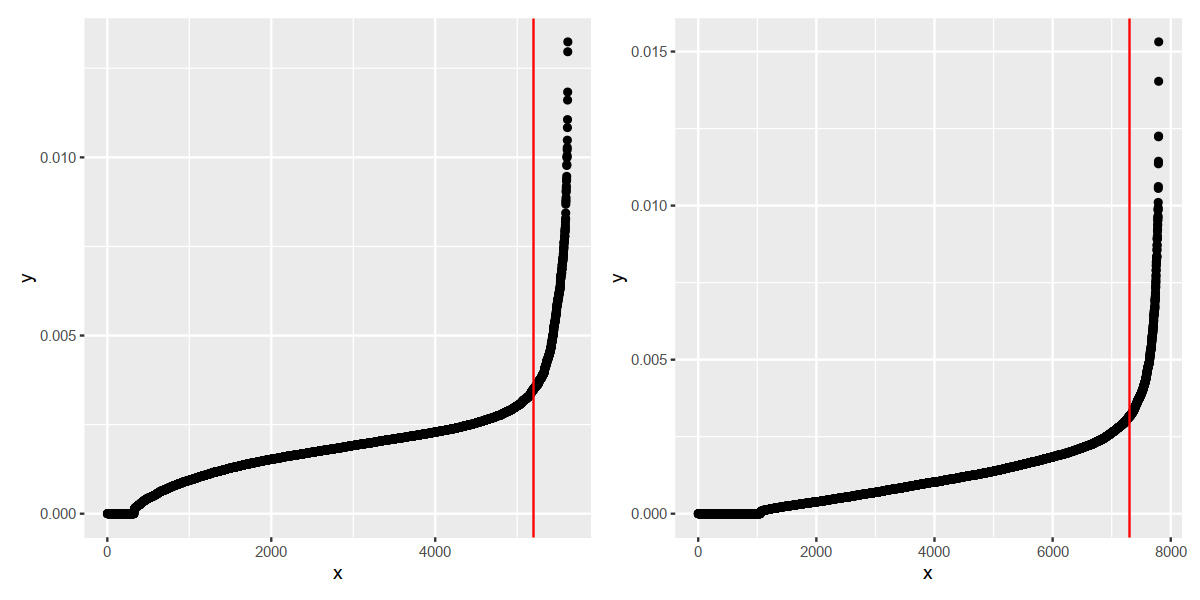

In [16]:
options(repr.plot.width = 10, repr.plot.height = 5)

D1M_RANK = 5200
D2M_RANK = 7300
# look at distribution of normalized number of overlaps and choose a knee point
ggplot(data.frame(x=seq(nrow(d1m_osum)), y=sort(d1m_osum$frac))) +
geom_point(aes(x=x,y=y)) + geom_vline(xintercept = D1M_RANK, color='red') |
ggplot(data.frame(x=seq(nrow(d2m_osum)), y=sort(d2m_osum$frac))) +
geom_point(aes(x=x,y=y)) + geom_vline(xintercept = D2M_RANK, color='red')

In [21]:
d1m_frac_thresh = sort(d1m_osum$frac)[D1M_RANK]
d2m_frac_thresh = sort(d2m_osum$frac)[D2M_RANK]
d1m_frac_thresh
d2m_frac_thresh

[1] 0.00348547

[1] 0.003161251

How many of these are already called doublets?

In [23]:
mean(d1m_osum$Cell.Id[d1m_osum$frac > d1m_frac_thresh] %in% d1m_amulet_doub)
mean(d2m_osum$Cell.Id[d2m_osum$frac > d2m_frac_thresh] %in% d2m_amulet_doub)

[1] 0.8133971

[1] 0.7620968

We have more that would be best if called doublets. Add these to set.

In [30]:
d1m_final_doub = union(d1m_amulet_doub, d1m_osum$Cell.Id[d1m_osum$frac > d1m_frac_thresh])
d2m_final_doub = union(d2m_amulet_doub, d2m_osum$Cell.Id[d2m_osum$frac > d2m_frac_thresh])

In [31]:
length(d1m_final_doub)
length(d2m_final_doub)

[1] 859

[1] 972

In [36]:
write.table(d1m_final_doub, "./outs/20220607_w_knee_point/D1M_doublet.txt", quote=F, row.names=F, col.names=F)
write.table(d2m_final_doub, "./outs/20220607_w_knee_point/D2M_doublet.txt", quote=F, row.names=F, col.names=F)

---

In [37]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] patchwork_1.0.0 ggplot2_3.3.3  

loaded via a namespace (and not attached):
 [1] magrittr_1.5      tidyselect_1.1.0  munsell_0.5.0     uuid_0.1-4       
 [5] colorspace_1.4-1  R6_2.4.1          rlang_0.4.11      dplyr_1.0.2      
 [9] tools_3.6.3       grid_3.6.3        gtable_0.3.0      withr_